# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [45]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime as dt
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [47]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [51]:
#Initializing a dataframe for the data

cities_df = pd.DataFrame({"City":cities})
cities_df["Max Temp (F)"] = ""
cities_df["Humidity (%)"] = ""
cities_df["Cloudiness (%)"] = ""
cities_df["Wind Speed (mph)"] = ""
cities_df["Lat"] = ""
cities_df["Lon"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""

cities_df

,City,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Lat,Lon,Country,Date
0,nampula,,,,,,,,
1,albany,,,,,,,,
2,chokurdakh,,,,,,,,
3,port augusta,,,,,,,,
4,komsomolskiy,,,,,,,,
...,...,...,...,...,...,...,...,...,...
637,belyy yar,,,,,,,,
638,port hawkesbury,,,,,,,,
639,arroio do meio,,,,,,,,
640,lompoc,,,,,,,,


In [52]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
print("Beginning Data Retrieval")
print("------------------------")
for index, row in cities_df.iterrows():
    
    city = row['City']
    full_url = base_url + "q=" + city + "&appid=" + weather_api_key + "&units=" + units
    
    print(f"Retrieving Results for Index {index}: {city}.")
    response = requests.get(full_url).json()
    
    try:
        cities_df.loc[index, 'Max Temp (F)'] = response['main']['temp_max']
        cities_df.loc[index, 'Humidity (%)'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness (%)'] = response['clouds']['all']
        cities_df.loc[index, 'Wind Speed (mph)'] = response['wind']['speed']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lon'] = response['coord']['lon']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        
    except KeyError:
        print("City not found. Skipping...")
        cities_df.drop(index, inplace= True)

Beginning Data Retrieval
------------------------
Retrieving Results for Index 0: nampula.
Retrieving Results for Index 1: albany.
Retrieving Results for Index 2: chokurdakh.
Retrieving Results for Index 3: port augusta.
Retrieving Results for Index 4: komsomolskiy.
Retrieving Results for Index 5: halalo.
City not found. Skipping...
Retrieving Results for Index 6: punta arenas.
Retrieving Results for Index 7: tabuk.
Retrieving Results for Index 8: isangel.
Retrieving Results for Index 9: halifax.
Retrieving Results for Index 10: mataura.
Retrieving Results for Index 11: yulara.
Retrieving Results for Index 12: hermanus.
Retrieving Results for Index 13: ushuaia.
Retrieving Results for Index 14: boguchany.
Retrieving Results for Index 15: puerto escondido.
Retrieving Results for Index 16: illoqqortoormiut.
City not found. Skipping...
Retrieving Results for Index 17: kaitangata.
Retrieving Results for Index 18: zbarazh.
Retrieving Results for Index 19: neuquen.
Retrieving Results for Inde

Retrieving Results for Index 175: tomatlan.
Retrieving Results for Index 176: bontang.
Retrieving Results for Index 177: ancud.
Retrieving Results for Index 178: sorland.
Retrieving Results for Index 179: san patricio.
Retrieving Results for Index 180: burica.
City not found. Skipping...
Retrieving Results for Index 181: moranbah.
Retrieving Results for Index 182: desna.
Retrieving Results for Index 183: grand gaube.
Retrieving Results for Index 184: mahebourg.
Retrieving Results for Index 185: skagastrond.
City not found. Skipping...
Retrieving Results for Index 186: vaitupu.
City not found. Skipping...
Retrieving Results for Index 187: evans.
Retrieving Results for Index 188: caravelas.
Retrieving Results for Index 189: gedo.
Retrieving Results for Index 190: airai.
Retrieving Results for Index 191: nikolskoye.
Retrieving Results for Index 192: khani.
Retrieving Results for Index 193: cairns.
Retrieving Results for Index 194: motala.
Retrieving Results for Index 195: hami.
Retrieving

Retrieving Results for Index 351: nishihara.
Retrieving Results for Index 352: stornoway.
Retrieving Results for Index 353: sychevka.
Retrieving Results for Index 354: koumac.
Retrieving Results for Index 355: esperance.
Retrieving Results for Index 356: sao felix do xingu.
Retrieving Results for Index 357: barbar.
City not found. Skipping...
Retrieving Results for Index 358: peniche.
Retrieving Results for Index 359: parczew.
Retrieving Results for Index 360: raudeberg.
Retrieving Results for Index 361: dolores.
Retrieving Results for Index 362: flin flon.
Retrieving Results for Index 363: one hundred mile house.
City not found. Skipping...
Retrieving Results for Index 364: plouzane.
Retrieving Results for Index 365: inhambane.
Retrieving Results for Index 366: dakar.
Retrieving Results for Index 367: kalmunai.
Retrieving Results for Index 368: tungor.
Retrieving Results for Index 369: arawa.
Retrieving Results for Index 370: taoudenni.
Retrieving Results for Index 371: miguel calmon.

Retrieving Results for Index 528: kismayo.
Retrieving Results for Index 529: khowst.
Retrieving Results for Index 530: centenario do sul.
Retrieving Results for Index 531: sulangan.
Retrieving Results for Index 532: george town.
Retrieving Results for Index 533: kulevcha.
Retrieving Results for Index 534: rungata.
City not found. Skipping...
Retrieving Results for Index 535: tahe.
Retrieving Results for Index 536: kalivai.
Retrieving Results for Index 537: cartagena.
Retrieving Results for Index 538: vila franca do campo.
Retrieving Results for Index 539: warrnambool.
Retrieving Results for Index 540: bairiki.
Retrieving Results for Index 541: gwadar.
Retrieving Results for Index 542: sur.
Retrieving Results for Index 543: antsohihy.
Retrieving Results for Index 544: viligili.
City not found. Skipping...
Retrieving Results for Index 545: saposoa.
Retrieving Results for Index 546: broome.
Retrieving Results for Index 547: lalibela.
Retrieving Results for Index 548: pisco.
Retrieving Res

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [53]:
cities_df.reset_index(drop = True, inplace = True)
cities_df.to_csv(output_data_file)
cities_df

,City,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Lat,Lon,Country,Date
0,nampula,78.75,53,40,9.22,-15.1165,39.2666,MZ,1651674304
1,albany,51.64,91,100,1.99,42.6001,-73.9662,US,1651674194
2,chokurdakh,11.57,94,100,3.09,70.6333,147.9167,RU,1651674305
3,port augusta,54,63,19,12.71,-32.5,137.7667,AU,1651674305
4,komsomolskiy,72.32,60,75,9.22,40.4272,71.7189,UZ,1651673834
...,...,...,...,...,...,...,...,...,...
585,belyy yar,42.85,40,0,4.47,53.6039,91.3903,RU,1651674526
586,port hawkesbury,57.9,66,0,6.91,45.6169,-61.3485,CA,1651674527
587,arroio do meio,67.87,100,100,5.79,-29.4011,-51.945,BR,1651674527
588,lompoc,48.94,89,0,6.91,34.6391,-120.4579,US,1651674528


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [57]:
cities_df.loc[cities_df['Humidity (%)'] > 100]

,City,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Lat,Lon,Country,Date


In [59]:
#  Get the indices of cities that have humidity over 100%.
humid_100 = []
for index, row in cities_df.iterrows():
    if row['Humidity (%)'] > 100:
        humid_100.append(index)

[]

In [62]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = cities_df.drop(humid_100)
clean_city_df.reset_index(drop = True, inplace = True)

In [63]:
clean_city_df

,City,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Lat,Lon,Country,Date
0,nampula,78.75,53,40,9.22,-15.1165,39.2666,MZ,1651674304
1,albany,51.64,91,100,1.99,42.6001,-73.9662,US,1651674194
2,chokurdakh,11.57,94,100,3.09,70.6333,147.9167,RU,1651674305
3,port augusta,54,63,19,12.71,-32.5,137.7667,AU,1651674305
4,komsomolskiy,72.32,60,75,9.22,40.4272,71.7189,UZ,1651673834
...,...,...,...,...,...,...,...,...,...
585,belyy yar,42.85,40,0,4.47,53.6039,91.3903,RU,1651674526
586,port hawkesbury,57.9,66,0,6.91,45.6169,-61.3485,CA,1651674527
587,arroio do meio,67.87,100,100,5.79,-29.4011,-51.945,BR,1651674527
588,lompoc,48.94,89,0,6.91,34.6391,-120.4579,US,1651674528


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

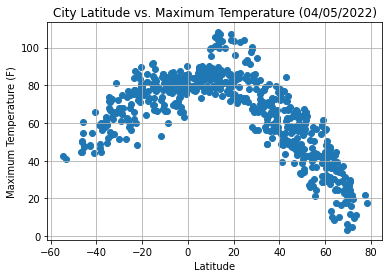

In [110]:
city_lat = clean_city_df['Lat']

plt.scatter(city_lat, clean_city_df['Max Temp (F)'])
plt.title(f"City Latitude vs. Maximum Temperature ({dt.datetime.today().strftime('%d/%m/%Y')})")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("Images/lat_temp_all.png")
plt.show()

## Latitude vs. Humidity Plot

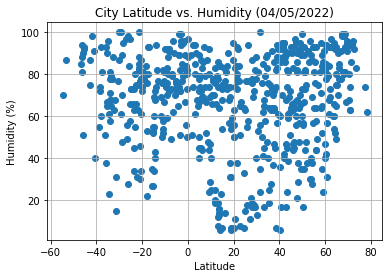

In [84]:
plt.scatter(city_lat, clean_city_df['Humidity (%)'])
plt.title(f"City Latitude vs. Humidity ({dt.datetime.today().strftime('%d/%m/%Y')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("Images/lat_humid_all.png")
plt.show()

## Latitude vs. Cloudiness Plot

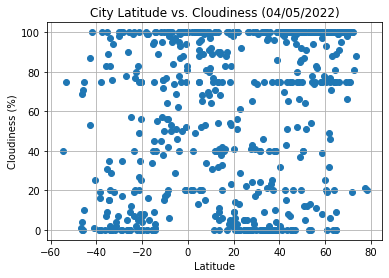

In [85]:
plt.scatter(city_lat, clean_city_df['Cloudiness (%)'])
plt.title(f"City Latitude vs. Cloudiness ({dt.datetime.today().strftime('%d/%m/%Y')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("Images/lat_cloud_all.png")
plt.show()

## Latitude vs. Wind Speed Plot

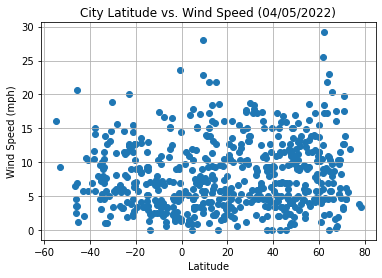

In [112]:
plt.scatter(city_lat, clean_city_df['Wind Speed (mph)'])
plt.title(f"City Latitude vs. Wind Speed ({dt.datetime.today().strftime('%d/%m/%Y')})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("Images/lat_wind_all.png")
plt.show()

## Linear Regression

In [90]:
north_cities_df = clean_city_df.loc[clean_city_df['Lat'] >= 0]
south_cities_df = clean_city_df.loc[clean_city_df['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8802797988039084


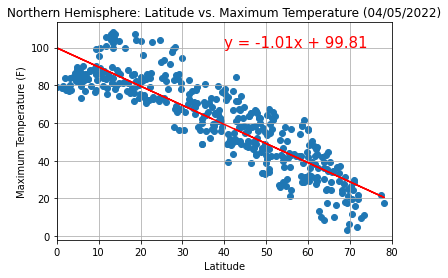

In [131]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Lat'].astype('float'), 
                                                        north_cities_df['Max Temp (F)'].astype('float'))
regress_values = north_cities_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")

plt.scatter(north_cities_df['Lat'], north_cities_df['Max Temp (F)'])
plt.plot(north_cities_df['Lat'], regress_values, "r-")
plt.title(f"Northern Hemisphere: Latitude vs. Maximum Temperature ({dt.datetime.today().strftime('%d/%m/%Y')})")
plt.annotate(line_eq,(40,100),fontsize=15,color="red")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(0,80)
plt.grid()
plt.savefig("Images/lat_temp_north.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7140703956359049


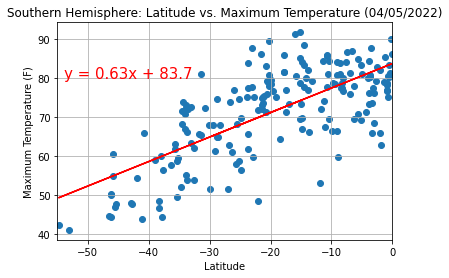

In [132]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Lat'].astype('float'), 
                                                        south_cities_df['Max Temp (F)'].astype('float'))
regress_values = south_cities_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")

plt.scatter(south_cities_df['Lat'], south_cities_df['Max Temp (F)'])
plt.plot(south_cities_df['Lat'], regress_values, "r-")
plt.title(f"Southern Hemisphere: Latitude vs. Maximum Temperature ({dt.datetime.today().strftime('%d/%m/%Y')})")
plt.annotate(line_eq,(-54,80),fontsize=15,color="red")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-55, 0)
plt.grid()
plt.savefig("Images/lat_temp_south.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.23506770923022416


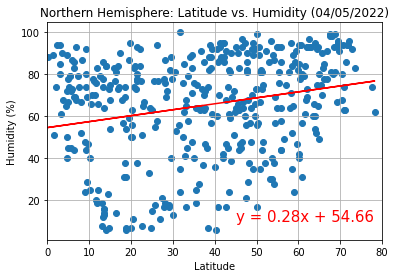

In [133]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Lat'].astype('float'), 
                                                        north_cities_df['Humidity (%)'].astype('float'))
regress_values = north_cities_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")

plt.scatter(north_cities_df['Lat'], north_cities_df['Humidity (%)'])
plt.plot(north_cities_df['Lat'], regress_values, "r-")
plt.title(f"Northern Hemisphere: Latitude vs. Humidity ({dt.datetime.today().strftime('%d/%m/%Y')})")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(0,80)
plt.grid()
plt.savefig("Images/lat_humid_north.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06517581006478686


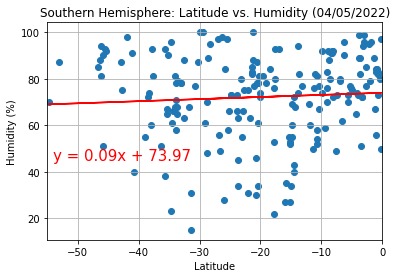

In [136]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Lat'].astype('float'), 
                                                        south_cities_df['Humidity (%)'].astype('float'))
regress_values = south_cities_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")

plt.scatter(south_cities_df['Lat'], south_cities_df['Humidity (%)'])
plt.plot(south_cities_df['Lat'], regress_values, "r-")
plt.title(f"Southern Hemisphere: Latitude vs. Humidity ({dt.datetime.today().strftime('%d/%m/%Y')})")
plt.annotate(line_eq,(-54,45),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-55, 0)
plt.grid()
plt.savefig("Images/lat_humid_south.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.18409725297079388


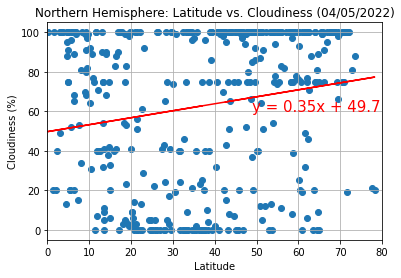

In [144]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Lat'].astype('float'), 
                                                        north_cities_df['Cloudiness (%)'].astype('float'))
regress_values = north_cities_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")

plt.scatter(north_cities_df['Lat'], north_cities_df['Cloudiness (%)'])
plt.plot(north_cities_df['Lat'], regress_values, "r-")
plt.title(f"Northern Hemisphere: Latitude vs. Cloudiness ({dt.datetime.today().strftime('%d/%m/%Y')})")
plt.annotate(line_eq,(49,60),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(0,80)
plt.grid()
plt.savefig("Images/lat_cloud_north.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3729469527247289


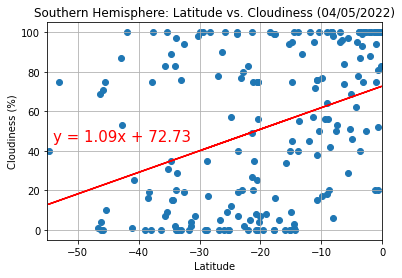

In [146]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Lat'].astype('float'), 
                                                        south_cities_df['Cloudiness (%)'].astype('float'))
regress_values = south_cities_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")

plt.scatter(south_cities_df['Lat'], south_cities_df['Cloudiness (%)'])
plt.plot(south_cities_df['Lat'], regress_values, "r-")
plt.title(f"Southern Hemisphere: Latitude vs. Cloudiness ({dt.datetime.today().strftime('%d/%m/%Y')})")
plt.annotate(line_eq,(-54,45),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(-55, 0)
plt.grid()
plt.savefig("Images/lat_cloud_south.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08152400390700906


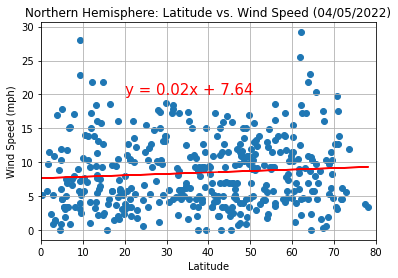

In [148]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Lat'].astype('float'), 
                                                        north_cities_df['Wind Speed (mph)'].astype('float'))
regress_values = north_cities_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")

plt.scatter(north_cities_df['Lat'], north_cities_df['Wind Speed (mph)'])
plt.plot(north_cities_df['Lat'], regress_values, "r-")
plt.title(f"Northern Hemisphere: Latitude vs. Wind Speed ({dt.datetime.today().strftime('%d/%m/%Y')})")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(0,80)
plt.grid()
plt.savefig("Images/lat_wind_north.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.18118775571068094


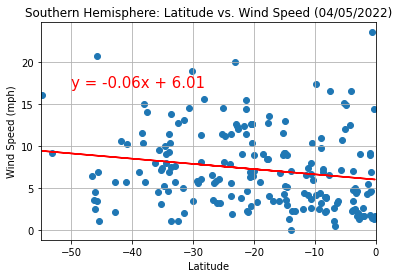

In [150]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Lat'].astype('float'), 
                                                        south_cities_df['Wind Speed (mph)'].astype('float'))
regress_values = south_cities_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")

plt.scatter(south_cities_df['Lat'], south_cities_df['Wind Speed (mph)'])
plt.plot(south_cities_df['Lat'], regress_values, "r-")
plt.title(f"Southern Hemisphere: Latitude vs. Wind Speed ({dt.datetime.today().strftime('%d/%m/%Y')})")
plt.annotate(line_eq,(-50,17),fontsize=15,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-55, 0)
plt.grid()
plt.savefig("Images/lat_wind_south.png")
plt.show()

# Analysis



From our data, it is apparent that the only value which can be accurately predicted through latitude is maximum temperature. The other values had r-values with a magnitude of less than 0.5 which indicates that they do not have a correlation with latitude, even when separating the data into the northern and southern hemispheres.

When looking at the maximum temperature, the northern hemisphere has an r-value of -0.8802797988039084 going from 0 degrees to 80 degrees and the southern hemisphere has an r-value of 0.7140703956359049 going from -55 to 0 degrees. This indicates that both have strong correlations with latitude and that the the maximum temperature increases the closer one gets to the equator.

Interestingly, the magnitude of the r-value for the southern hemisphere is 0.17 less than for the northern hemisphere. This indicates that the correlation is not as strong. This is likely due to the concentration of population centers in the southern hemisphere as one gets farther from the equator. As we can see from the plots, the data is more evenly distributed along the latitude axis in the plot for the northern hemisphere compared to the south. This could be the reason for the lower accuracy in the linear regression for the southern hemisphere.